# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Our business objective is to identify key determinants influencing used car prices. This includes transforming the business obective into a data mining task that analyzes various features such as model, condition, mileage, year manufactored, and others. The goal is to leverage the data mining techniques to disover any patterns or relationships that affect such variations in car price. By identifying these factors, we aim to develop predictive models that can estimate the prices of used cars based on their attributes.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Steps:

1. Load Data
2. Preview Data
3. Assess the data
4. Check for null values
5. Exploratory Data Analysis (EDA)

In [25]:
# 1. Load Data

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('data/vehicles.csv')

# ID column seemed unnecessary to me
column_to_drop = 'id'
df.drop(columns=[column_to_drop], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

In [28]:
# 2. Preview Data
df.info()
#data set is mostly categorical, hence lots of transformation needs to be done

df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [31]:
# 3. Assess the Data

print(f"Dataset shape: {df.shape}")
df.describe()

Dataset shape: (426880, 17)


,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [34]:
# 4. Check for null values 

df.isnull().sum()

#lot of cleaning needs to be done

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

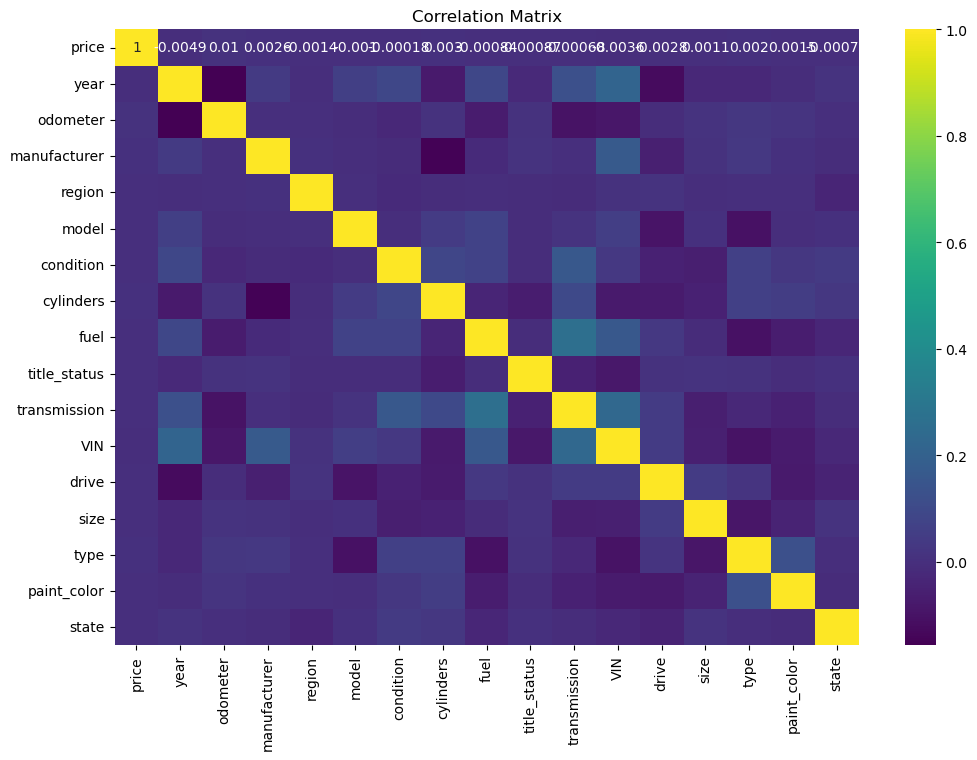

In [32]:
# 5. Exploratory Data Analysis (EDA)

# Visualize some early correlations
plt.figure(figsize=(12, 8))
sns.heatmap(transformed_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

# We see some correlation between transmission and fuel. Some correlation between paint color and car type.

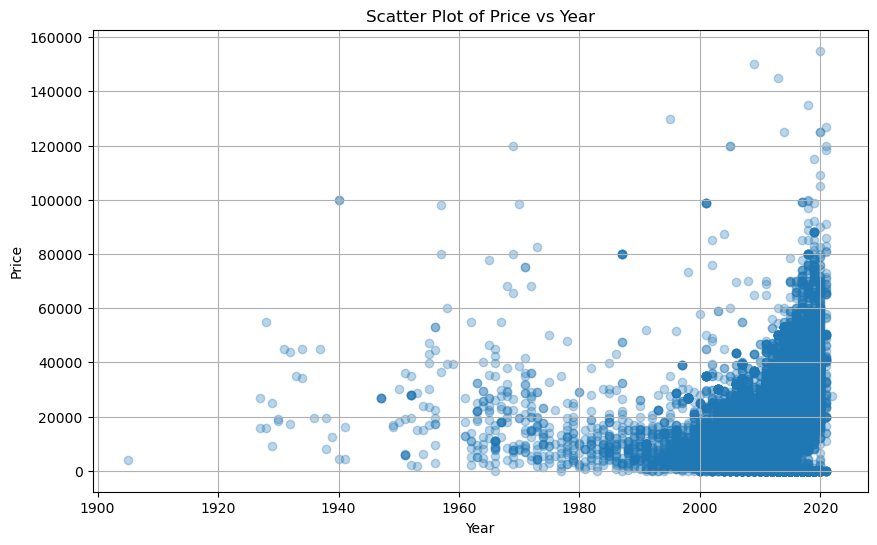

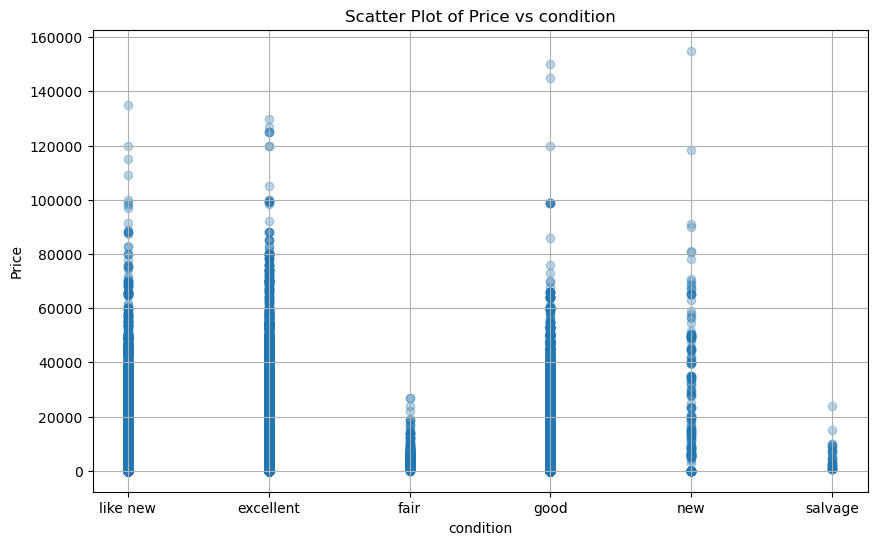

In [38]:
# I was interested to see the price vs year
df = pd.read_csv('data/vehicles.csv')

df = df.dropna()

# Keep only 'price' and 'year' columns
df_subset = df[['price', 'year']]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_subset['year'], df_subset['price'], alpha=0.3)
plt.title('Scatter Plot of Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()


#Newer Cars sold for higher (Makes sense)

# Keep only 'price' and 'odometer' columns
df_subset = df[['price', 'condition']]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_subset['condition'], df_subset['price'], alpha=0.3)
plt.title('Scatter Plot of Price vs condition')
plt.xlabel('condition')
plt.ylabel('Price')
plt.grid(True)
plt.show()


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Import necessary libraries
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('data/vehicles.csv')

column_to_drop = 'id'
df.drop(columns=[column_to_drop], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

#  categorical features
categorical_features = ["manufacturer", "region","model", "condition", "cylinders", "fuel", "title_status",
                        "transmission", "VIN", "drive", "size", "type", "paint_color", "state"]

#  numerical columns
numerical_features = [col for col in df.columns if col not in categorical_features]

# Separate categorical and numerical columns
df_categorical = df[categorical_features]
df_numerical = df[numerical_features]

# OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit-transform the categorical data
df_categorical_encoded = ordinal_encoder.fit_transform(df_categorical)

# DataFrame of encoded categorical features
df_categorical_encoded = pd.DataFrame(df_categorical_encoded, columns=df_categorical.columns)

# Combine encoded categorical features with numerical features
transformed_df = pd.concat([df_numerical, df_categorical_encoded], axis=1)

# Print the resulting DataFrame
transformed_df.info()

transformed_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   odometer      422480 non-null  float64
 3   manufacturer  409234 non-null  float64
 4   region        426880 non-null  float64
 5   model         421603 non-null  float64
 6   condition     252776 non-null  float64
 7   cylinders     249202 non-null  float64
 8   fuel          423867 non-null  float64
 9   title_status  418638 non-null  float64
 10  transmission  424324 non-null  float64
 11  VIN           265838 non-null  float64
 12  drive         296313 non-null  float64
 13  size          120519 non-null  float64
 14  type          334022 non-null  float64
 15  paint_color   296677 non-null  float64
 16  state         426880 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 55.4 MB


price                0
year              1205
odometer          4400
manufacturer     17646
region               0
model             5277
condition       174104
cylinders       177678
fuel              3013
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [14]:
### remove null values
# a more streamlined process was tried, but for some reason it always took too much time

transformed_df['year'].fillna(transformed_df['year'].mean(), inplace = True)
transformed_df['model'].fillna(transformed_df['model'].mode()[0], inplace = True)
transformed_df['condition'].fillna(transformed_df['condition'].mode()[0], inplace = True)
transformed_df['manufacturer'].fillna(transformed_df['manufacturer'].mode()[0], inplace = True)
transformed_df['cylinders'].fillna(transformed_df['cylinders'].mode()[0], inplace = True)
transformed_df['fuel'].fillna(transformed_df['fuel'].mode()[0], inplace = True)
transformed_df['odometer'].fillna(transformed_df['odometer'].mean(), inplace = True)
transformed_df['title_status'].fillna(transformed_df['title_status'].mode()[0], inplace = True)
transformed_df['transmission'].fillna(transformed_df['transmission'].mode()[0], inplace = True)
transformed_df['VIN'].fillna(transformed_df['VIN'].mode()[0], inplace = True)
transformed_df['drive'].fillna(transformed_df['drive'].mode()[0], inplace = True)
transformed_df['size'].fillna(transformed_df['size'].mode()[0], inplace = True)
transformed_df['type'].fillna(transformed_df['type'].mode()[0], inplace = True)
transformed_df['paint_color'].fillna(transformed_df['paint_color'].mode()[0], inplace = True)
transformed_df.isnull().sum()

price           0
year            0
odometer        0
manufacturer    0
region          0
model           0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

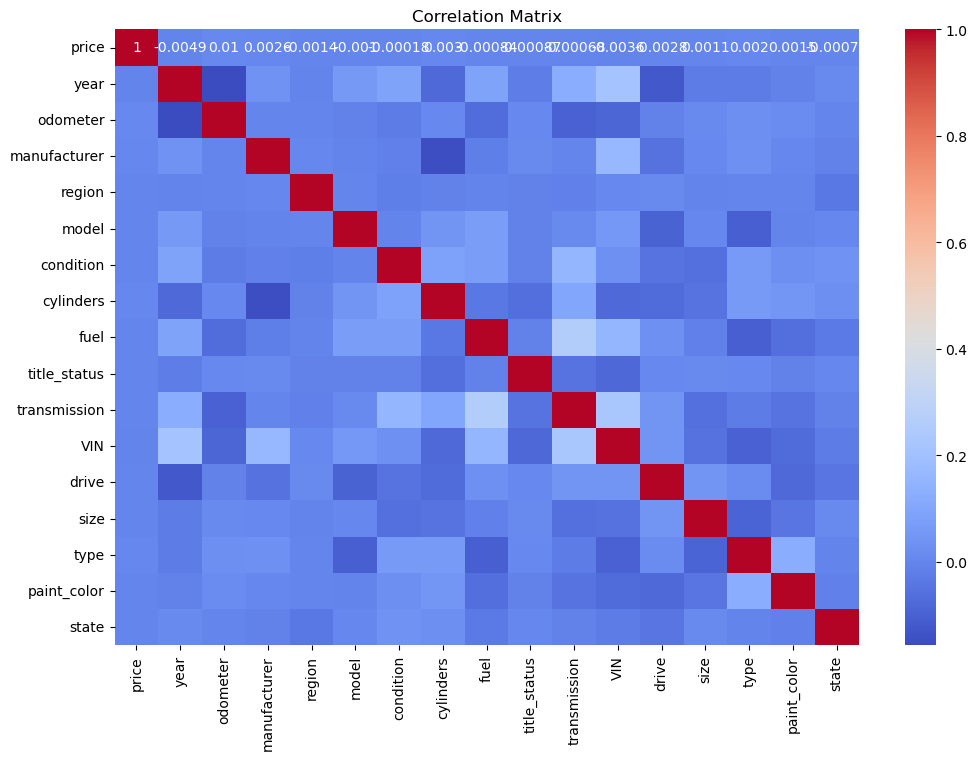

In [15]:
# Visualize correlations one more time 
plt.figure(figsize=(12, 8))
sns.heatmap(transformed_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [16]:
X = transformed_df.drop('price', axis=1)
y = transformed_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}
     


# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")
     

Linear Regression: RMSE = 19786236.8919, R2 = -0.0001
Ridge Regression: RMSE = 19786236.8910, R2 = -0.0001
Lasso Regression: RMSE = 19786236.8918, R2 = -0.0001
Elastic Net Regression: RMSE = 19786219.6357, R2 = -0.0001


### Modeling with changed data set

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('data/vehicles.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [2]:
### remove null values
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [3]:
column_to_drop = 'id'
df.drop(columns=[column_to_drop], inplace=True)

column_to_drop = 'cylinders'
df.drop(columns=[column_to_drop], inplace=True)


column_to_drop = 'VIN'
df.drop(columns=[column_to_drop], inplace=True)

column_to_drop = 'drive'
df.drop(columns=[column_to_drop], inplace=True)

column_to_drop = 'transmission'
df.drop(columns=[column_to_drop], inplace=True)

df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
fuel            0
odometer        0
title_status    0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [4]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [5]:
df = onehot_encode(
    df,
    ['region', 'manufacturer', 'fuel', 'title_status', 'type', 'state', 'model', 'condition', 'size', 'paint_color'],
    ['reg', 'manufacturer', 'fuel', 'title', 'type', 'state','model', 'condition', 'size', 'paint_color'],
)

In [6]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 34868 entries, 126 to 426836
Columns: 5672 entries, price to paint_color_yellow
dtypes: bool(5669), float64(2), int64(1)
memory usage: 189.6 MB


price                 0
year                  0
odometer              0
reg_SF bay area       0
reg_abilene           0
                     ..
paint_color_purple    0
paint_color_red       0
paint_color_silver    0
paint_color_white     0
paint_color_yellow    0
Length: 5672, dtype: int64

In [7]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(max_iter=10000),  # Increase max_iter 
    'Lasso Regression': Lasso(max_iter=10000),  # Increase max_iter 
    'Elastic Net Regression': ElasticNet(max_iter=10000),  # Increase max_iter
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

# Print results
print("\nResults:")
for name, result in results.items():
    print(f"{name}: RMSE = {result['RMSE']:.4f}, R2 = {result['R2']:.4f}")

Linear Regression: RMSE = 704365719.6538, R2 = -2626622006.8157
Ridge Regression: RMSE = 9170.9563, R2 = 0.5547
Lasso Regression: RMSE = 9617.2267, R2 = 0.5103
Elastic Net Regression: RMSE = 12119.5095, R2 = 0.2224

Results:
Linear Regression: RMSE = 704365719.6538, R2 = -2626622006.8157
Ridge Regression: RMSE = 9170.9563, R2 = 0.5547
Lasso Regression: RMSE = 9617.2267, R2 = 0.5103
Elastic Net Regression: RMSE = 12119.5095, R2 = 0.2224


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for Ridge, Lasso, and Elastic Net
param_grid = {
    'Ridge__ridge__alpha': [0.1, 1.0, 10.0, 100.0],
    'Lasso__lasso__alpha': [0.01, 0.1, 1.0, 10.0],
    'ElasticNet__elasticnet__alpha': [0.01, 0.1, 1.0, 10.0],
    'ElasticNet__elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# Initialize the models within a pipeline
models = {
    'Ridge': Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(max_iter=10000))]),
    'Lasso': Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(max_iter=10000))]),
    'ElasticNet': Pipeline([('scaler', StandardScaler()), ('elasticnet', ElasticNet(max_iter=10000))])
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = model
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

print()
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Ridge: Cross-validation RMSE = 13648.3867
Lasso: Cross-validation RMSE = 12752.1527
ElasticNet: Cross-validation RMSE = 8930.4745

Evaluate the best models on the test set
Ridge: RMSE = 15000.5537, R2 = -0.1913
Lasso: RMSE = 13373.4229, R2 = 0.0531
ElasticNet: RMSE = 9238.5340, R2 = 0.5481


### interpretation of coefficients

In [17]:
# predictions
best_model = best_models['ElasticNet']
y_pred = best_model.predict(X_test)

# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_df.head()

,Actual,Predicted
421994,10900,14304.469451
359017,0,18483.334947
119389,21700,25869.169699
4642,8950,10234.281925
381660,8800,8745.373576


In [18]:
estimator_name = 'elasticnet'

# Access the ElasticNet estimator from the Pipeline
elastic_net_model = best_model.named_steps[estimator_name]

# Get coefficients and intercept
coefficients = pd.Series(elastic_net_model.coef_, index=X_train.columns)
intercept = elastic_net_model.intercept_

print("ElasticNet Coefficients:")
print(coefficients)
print("\nIntercept:", intercept)

ElasticNet Coefficients:
year                  1914.156491
odometer             -1509.319441
reg_SF bay area        188.354751
reg_abilene            -23.418764
reg_akron / canton      52.141789
                         ...     
paint_color_purple     -20.435344
paint_color_red         51.538181
paint_color_silver    -183.243405
paint_color_white       93.068239
paint_color_yellow     -31.962471
Length: 5671, dtype: float64

Intercept: 15817.149315264938


The odometer, region (abilene), paint color(purple, silver, and yellow) all show negative impacts, with odometer showing the most significant negative impact. On the other hand, year, region (SF bay area, akron / canton), paint color (red, white) all show positive impacts, with year showing the most significant positive impact.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

A high quality model should have results where the RMSE is low and R2 is highest. Our models before minimizing the dataset showed an RMSE value of around 19786236.8919 and R2 to be -0.0001. This suggests that the model has severe issues. This prompted us to refine our approach by focusing on a subset of the dataset, leading to significant improvement. By minimizing the dataset, we determined that Ridge Regression to be the best model before cross-validation. Our ridge regression model resulted in an RMSE score of 9170.9563 and an R2 value of 0.5547. A 0.5547 R2 value suggests that about 55% of the variance in the target variable is explained by the features in our model. This model is not that much better however, as we were expecting an RMSE score much lower ( < 10). After cross validation, all models show higher RMSE values on the test set compared to their cross-validation RMSE. This indicates over-fitting and generally bad performance. Ridge and Lasso regressions show a decrease in R2 on the test set compared to their cross-validation. Again, indicating bad performance. One interesting thing to note is that Elastic Net shows a slight improvement in R2 on the test set compared to cross-validation. This may suggest that it is better in generalizing to the unseen data. Ultimately, after cross-validation Elastic Net emerges as the best model even if further refinement is needed. Elastic Net had a RMSE score of 9238.5340 and an R2 value of 0.5481 (meaning that about 54.8% of the variance in the target variable is explained by the features in our model). 

The challenges encountered, including dataset size, inconsistencies, and complexity, significantly impacted initial model performance. Moving forward, we intend to revisit our data preparation phase to address these issues more rigorously. This includes addressing data inconsistencies such as missing values and outliers, which we suspect contributed to suboptimal model outcomes (also revisiting feature engineering and considering additional features). We could even explore more complex models that could potentially capture the underlying patterns in the data more effectively.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In this report, we aim to study the impact of various features on car prices. We used multiple regression models and tested them to accurately predict car prices. These models included, Linear, Ridge, Lasso, and Elastic Net regression models. Our analysis indicates that Elastic Net Regression is most suitable model for predicting used car prices for inventory management needs. After further refinement of the model, it will be best suited to confidently assist in predicting car prices. 

If you have any further questions or concerns please feel free to reach out. We look forward to assisting you in leveraging data-driven strategies for success in the used car market. 

Best regards,

Sridhar Kumar
UCBerkley